In [1]:
import time
from threading import Thread
import matplotlib.pyplot as plt
from pnb_bst.Pnb_Bst import Pnb_Bst
import numpy as np

In [2]:
def measure_throughput_threaded(
    operation, tree, keys, low_high, num_threads, iterations
):
    def worker():
        for i in range(iterations):
            operation(tree, keys[i % len(keys)], low_high)

    start_time = time.time()
    threads = []
    for _ in range(num_threads):
        thread = Thread(target=worker)
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()
    end_time = time.time()

    duration = end_time - start_time
    throughput = iterations * num_threads / duration
    return throughput

In [3]:
def plot_throughput(operation_name, throughputs, num_threads_list):
    plt.figure(figsize=(20, 10))
    plt.plot(num_threads_list, throughputs, marker="o")
    plt.xlabel("Number of Threads")
    plt.ylabel("Throughput (operations/second)")
    plt.title(f"{operation_name} Throughput vs Number of Threads")
    plt.grid(True)
    plt.savefig(
        f"img/{operation_name} Throughput vs Number of Threads.png", format="png"
    )
    plt.show()

In [4]:
def insert_operation(tree, key, low_high):
    tree.insert(key)


def search_operation(tree, key, low_high):
    return tree.search(key)


def delete_operation(tree, key, low_high):
    tree.delete(key)


def find_key_range_operation(tree, key, low_high):
    tree.find_key_range(low_high[0], low_high[1])

In [5]:
tree = Pnb_Bst()
num_of_leafs = 100

In [6]:
keys = [np.random.randint(0, 10000) for _ in range(num_of_leafs)]

# Measure and plot throughput for different number of threads
num_threads_list = [1, 2, 4, 8, 16, 32, 64, 80, 128]
iterations = 1000

for key in keys:
    tree.insert(key)

low_high = [np.random.randint(0, 10000), np.random.randint(0, 10000)]
low_high.sort()

In [ ]:
# Measure and plot insert throughput
insert_throughputs = [
    measure_throughput_threaded(
        insert_operation, tree, keys, low_high, num_threads, iterations
    )
    for num_threads in num_threads_list
]
plot_throughput("Insert", insert_throughputs, num_threads_list)

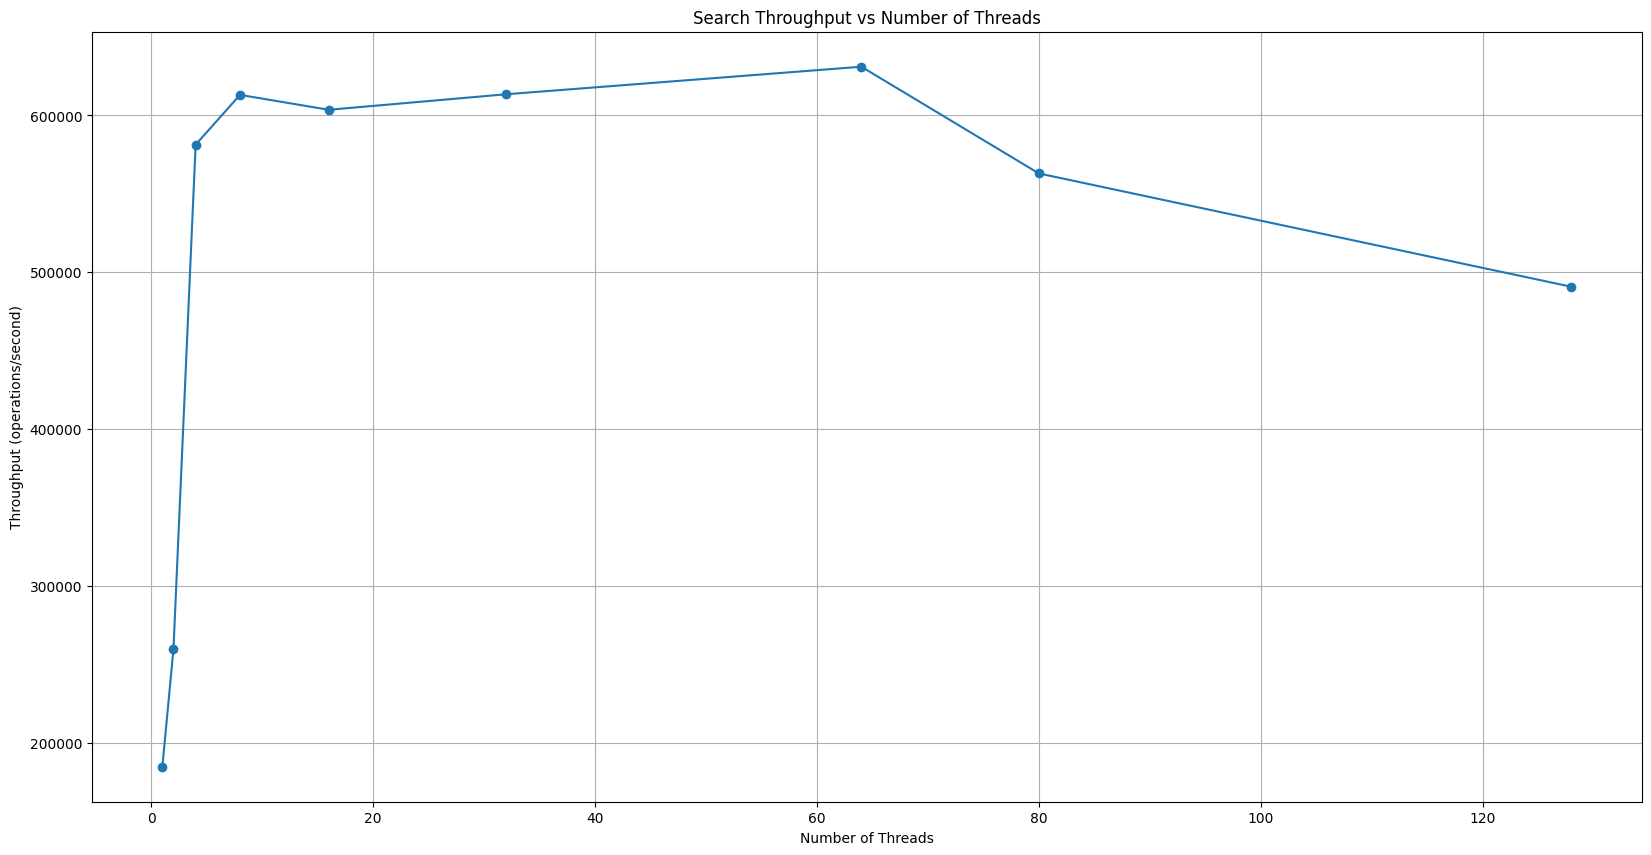

In [7]:
# Measure and plot search throughput
search_throughputs = [
    measure_throughput_threaded(
        search_operation, tree, keys, low_high, num_threads, iterations
    )
    for num_threads in num_threads_list
]
plot_throughput("Search", search_throughputs, num_threads_list)

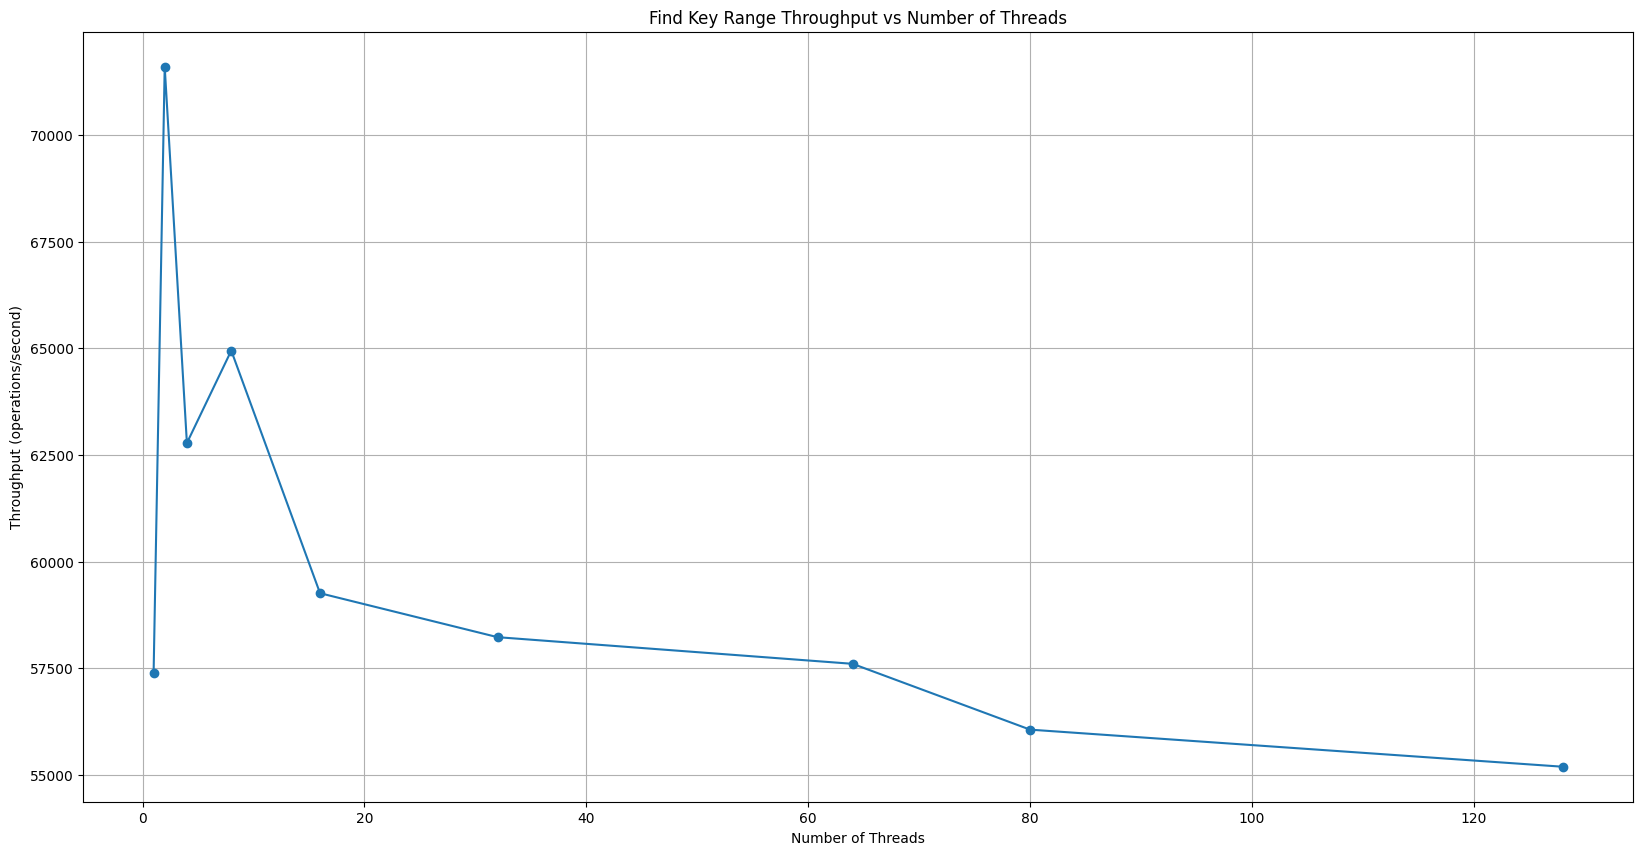

In [11]:
# Measure and plot find key range throughput
find_key_range_throughputs = [
    measure_throughput_threaded(
        find_key_range_operation, tree, keys, low_high, num_threads, iterations
    )
    for num_threads in num_threads_list
]
plot_throughput("Find Key Range", find_key_range_throughputs, num_threads_list)

In [ ]:
# Measure and plot delete throughput
delete_throughputs = [
    measure_throughput_threaded(
        delete_operation, tree, keys, low_high, num_threads, iterations
    )
    for num_threads in num_threads_list
]
plot_throughput("Delete", delete_throughputs, num_threads_list)